# Networkx

* Пакет для Python для манипулирования графиками и их анализа
* Содержит множество стандатных алгоритмов для графов

In [1]:
from typing import Any

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Networkx поддерживает неориентированные/ориентированные графы/мультиграфы (мультиграфы позволяют одной паре узлов иметь несколько ребер):
*  Неориентированный граф: `nx.Graph`
*  Ориентированный граф: `nx.DiGraph`
*  Неориентированный мультиграф: `nx.MultiGraph`
*  Ориентированный мультиграф: `nx.MultiDiGraph`

In [2]:
G = nx.Graph()

Networkx имеет отличный набор методов для отображения графов. Напишем функцию, которую будем использовать на вывода графов на экран

In [4]:
def plot_graph(G):
    options = dict(
        font_size=12,
        node_size=500,
        node_color="white",
        edgecolors="black",
    )
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, **options)
    if nx.is_weighted(G):
        labels = {e: G.edges[e]['weight'] for e in G.edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

Классы графов имеют интерфейс для явного добавления ребер и узлов. Следующие команды, например, строят граф ниже

![graph 1](graph_1.png)

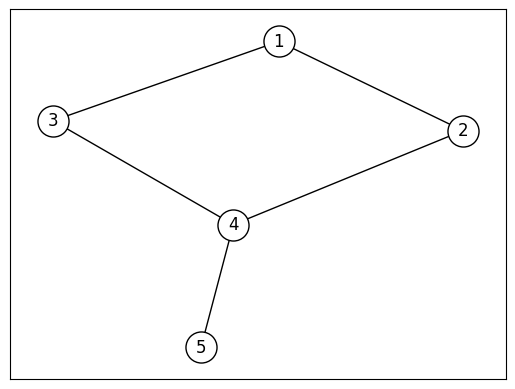

In [6]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 4)
G.add_edge(3, 4)
G.add_edge(4, 5)
plot_graph(G)

Мы также можем создать граф напрямую из списка ребер:

In [ ]:
G = nx.Graph()
edges = [(1, 2), (1, 3), (2, 4), (3, 4)]
G.add_edges_from(edges)
plot_graph(G)

Опционально мы всегда можем сделать граф взвешенным. Для этого в метод `add_edge()` передается ключевое слово `weight`. Тоже можно сделать и используя метод `add_weighted_edges_from()`:

In [ ]:
G = nx.Graph()
edges = [(1, 2, 0.5), (1, 3, 0.3), (2, 4, 0.1), (3, 4, 0.7)]
G.add_weighted_edges_from(edges)
plot_graph(G)

Названия узлов могут быть произвольными hashable. Мы также может добавлять произвольные аттрибуты в узлам и ребрам:

In [ ]:
G = nx.Graph()
G.add_nodes_from([
    ('Moscow', dict(population=13.1)),
    ('Saint Petersburg', dict(population=5.6)),
    ('Kazan', dict(population=1.3)),
    ('Novosibirsk', dict(population=1.6)),
])
G.add_edge('Moscow', 'Saint Petersburg', distance=712)
G.add_edge('Moscow', 'Kazan', distance=816)
G.add_edge('Moscow', 'Novosibirsk', distance=3356)
plot_graph(G)

Networkx предоставляет удобный интерфейс для доступа к узлам/ребрам и их аттрибутам, а также позволяет легко итерироваться по ним. Рассмотрим несколько популярных операций

Количество узлов в графе:

In [ ]:
len(G)

Количество ребер в графе:

In [ ]:
len(G.edges)

Проверка, присутствует ли узел в графе:

In [ ]:
'Moscow' in G

In [ ]:
G.has_node('Moscow')

Проверка, присутствует ли ребро в графе:

In [ ]:
('Moscow', 'Saint Petersburg') in G.edges

In [ ]:
G.has_edge('Moscow', 'Saint Petersburg')

Итерация по узлам:

In [ ]:
for n in G:
    if n != 'Moscow':
        print(n)

Итерация по ребрам:

In [ ]:
for n_in, n_out in G.edges:
    print(f'{n_in} -- {n_out}')

Итерацией по ребрам вместе с аттрибутами:

In [ ]:
for n_in, n_out, dist in G.edges.data('distance'):
    print(f'{n_in} -- {n_out} ({dist} km)')

Итерация по соседям узла:

In [ ]:
for n in G.neighbors('Moscow'):
    print(n)

Наконец, мы можем сохранять графы в файлы и вычитывать их из них. Для простых задач мы можем использовать `adjlist` и `edgelist` форматы:
* `adjlist` является компактным представлением матрицы смежности. Он не подходит для графов с аттрибутами
* `edgelist` является списком ребер с их аттрибутами
* Для обоих методов названия узлов не должны включать пробелов

In [ ]:
G = nx.Graph()
edges = [(1, 2, 0.5), (1, 3, 0.3), (2, 4, 0.1), (3, 4, 0.7)]
G.add_weighted_edges_from(edges)
nx.write_adjlist(G, 'test_graph.adjlist')

In [ ]:
nx.write_edgelist(G, 'test_graph.edgelist')

Методы `nx.read_adjlist()` и `nx.read_edgelist()` используются для чтения графов из файлов соответствующих форматов:

In [ ]:
G_1 = nx.read_adjlist('test_graph.adjlist')
G_2 = nx.read_edgelist('test_graph.edgelist')

### Упражнение 1

Напишите функцию, вычисляющую среднюю степень соседей для каждого из узлов, у которых в принципе есть соседи.

In [ ]:
def avg_neigh_degree(g: nx.Graph) -> dict[Any]:
    pass

In [ ]:
G = nx.erdos_renyi_graph(n=10, p=0.2)
plot_graph(G)

### Упражнение 2

Для n = 10, 20 и 30 найдите соответствующие значения p, при которых почти наверняка пройзодет невзвешенная перколяция в графе Эрдеша-Реньи G(n, p).

In [ ]:
def plot_percolation_curve(n):
    pass

In [ ]:
plot_percolation_curve(n=10)

In [ ]:
plot_percolation_curve(n=20)

In [ ]:
plot_percolation_curve(n=30)